In [45]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ggplot import *

import shared.util

%matplotlib inline

os.chdir('Z:/people/Abel/arena-automation/data')

In [2]:
dall = shared.util.loadFlySim('2016-12-14 12-10-17.msgpack')
d = dall.copy()
d = d[ d.istraj & d.is_flysim ]

Z:\people\Abel\arena-automation\analysis\shared\util.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fsTracking['istraj'][idx] = np.repeat(True, sum(idx))


In [24]:
d.trajectory.unique(), len(d.trajectory.unique())

(array([ 498,  554,  632,  638,  659,  676,  699,  833,  847,  881,  909,
         986,  996, 1011, 1038, 1072, 1084, 1180, 1256, 1280, 1302, 1339,
        1355, 1402, 1446, 1466, 1586, 1629, 1662, 1779, 1787, 1801, 1820,
        1856, 1939, 2002, 2009, 2014, 2044, 2049, 2079, 2100, 2142, 4148,
        4365, 4462, 4584, 4659, 4698, 4820, 4850, 5053, 5148, 5320, 5425,
        5533, 5559, 5579, 5593, 5598, 5607, 5621, 5679, 5692, 5707, 5722,
        5762, 5820, 5831, 5834, 5847, 5860, 5990, 6006, 6099, 6157, 6337,
        6374, 6378, 6385, 6392, 6397, 6438, 6444, 6478, 6521, 6580, 6650,
        6667, 7994, 8004, 8025, 8045, 8080, 8127, 8145, 8161, 8171, 8184], dtype=int64),
 99)

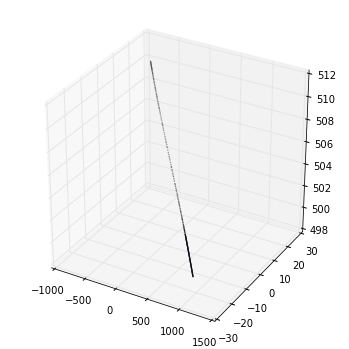

In [61]:
#pos = d[d.trajectory<500].as_matrix(['flysim.x','flysim.y','flysim.z'])
pos = d[d.trajectory<500].as_matrix(['fs.appr.x','fs.appr.y','fs.appr.z'])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:,0],pos[:,1],pos[:,2], s=0.1)

In [62]:
#cols = ['flysim.x','flysim.y','flysim.z']
cols = ['fs.appr.x','fs.appr.y','fs.appr.z']
def f(x):
    x['velocity'] =  np.concatenate((np.zeros(1),
        np.linalg.norm(
            np.diff(x.as_matrix(cols), 
        axis=0), axis=1)))
    return x
d = d.groupby('trajectory').apply(f)

In [63]:
d['relframe'] = d.frame - d.framestart

C:\Anaconda3\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


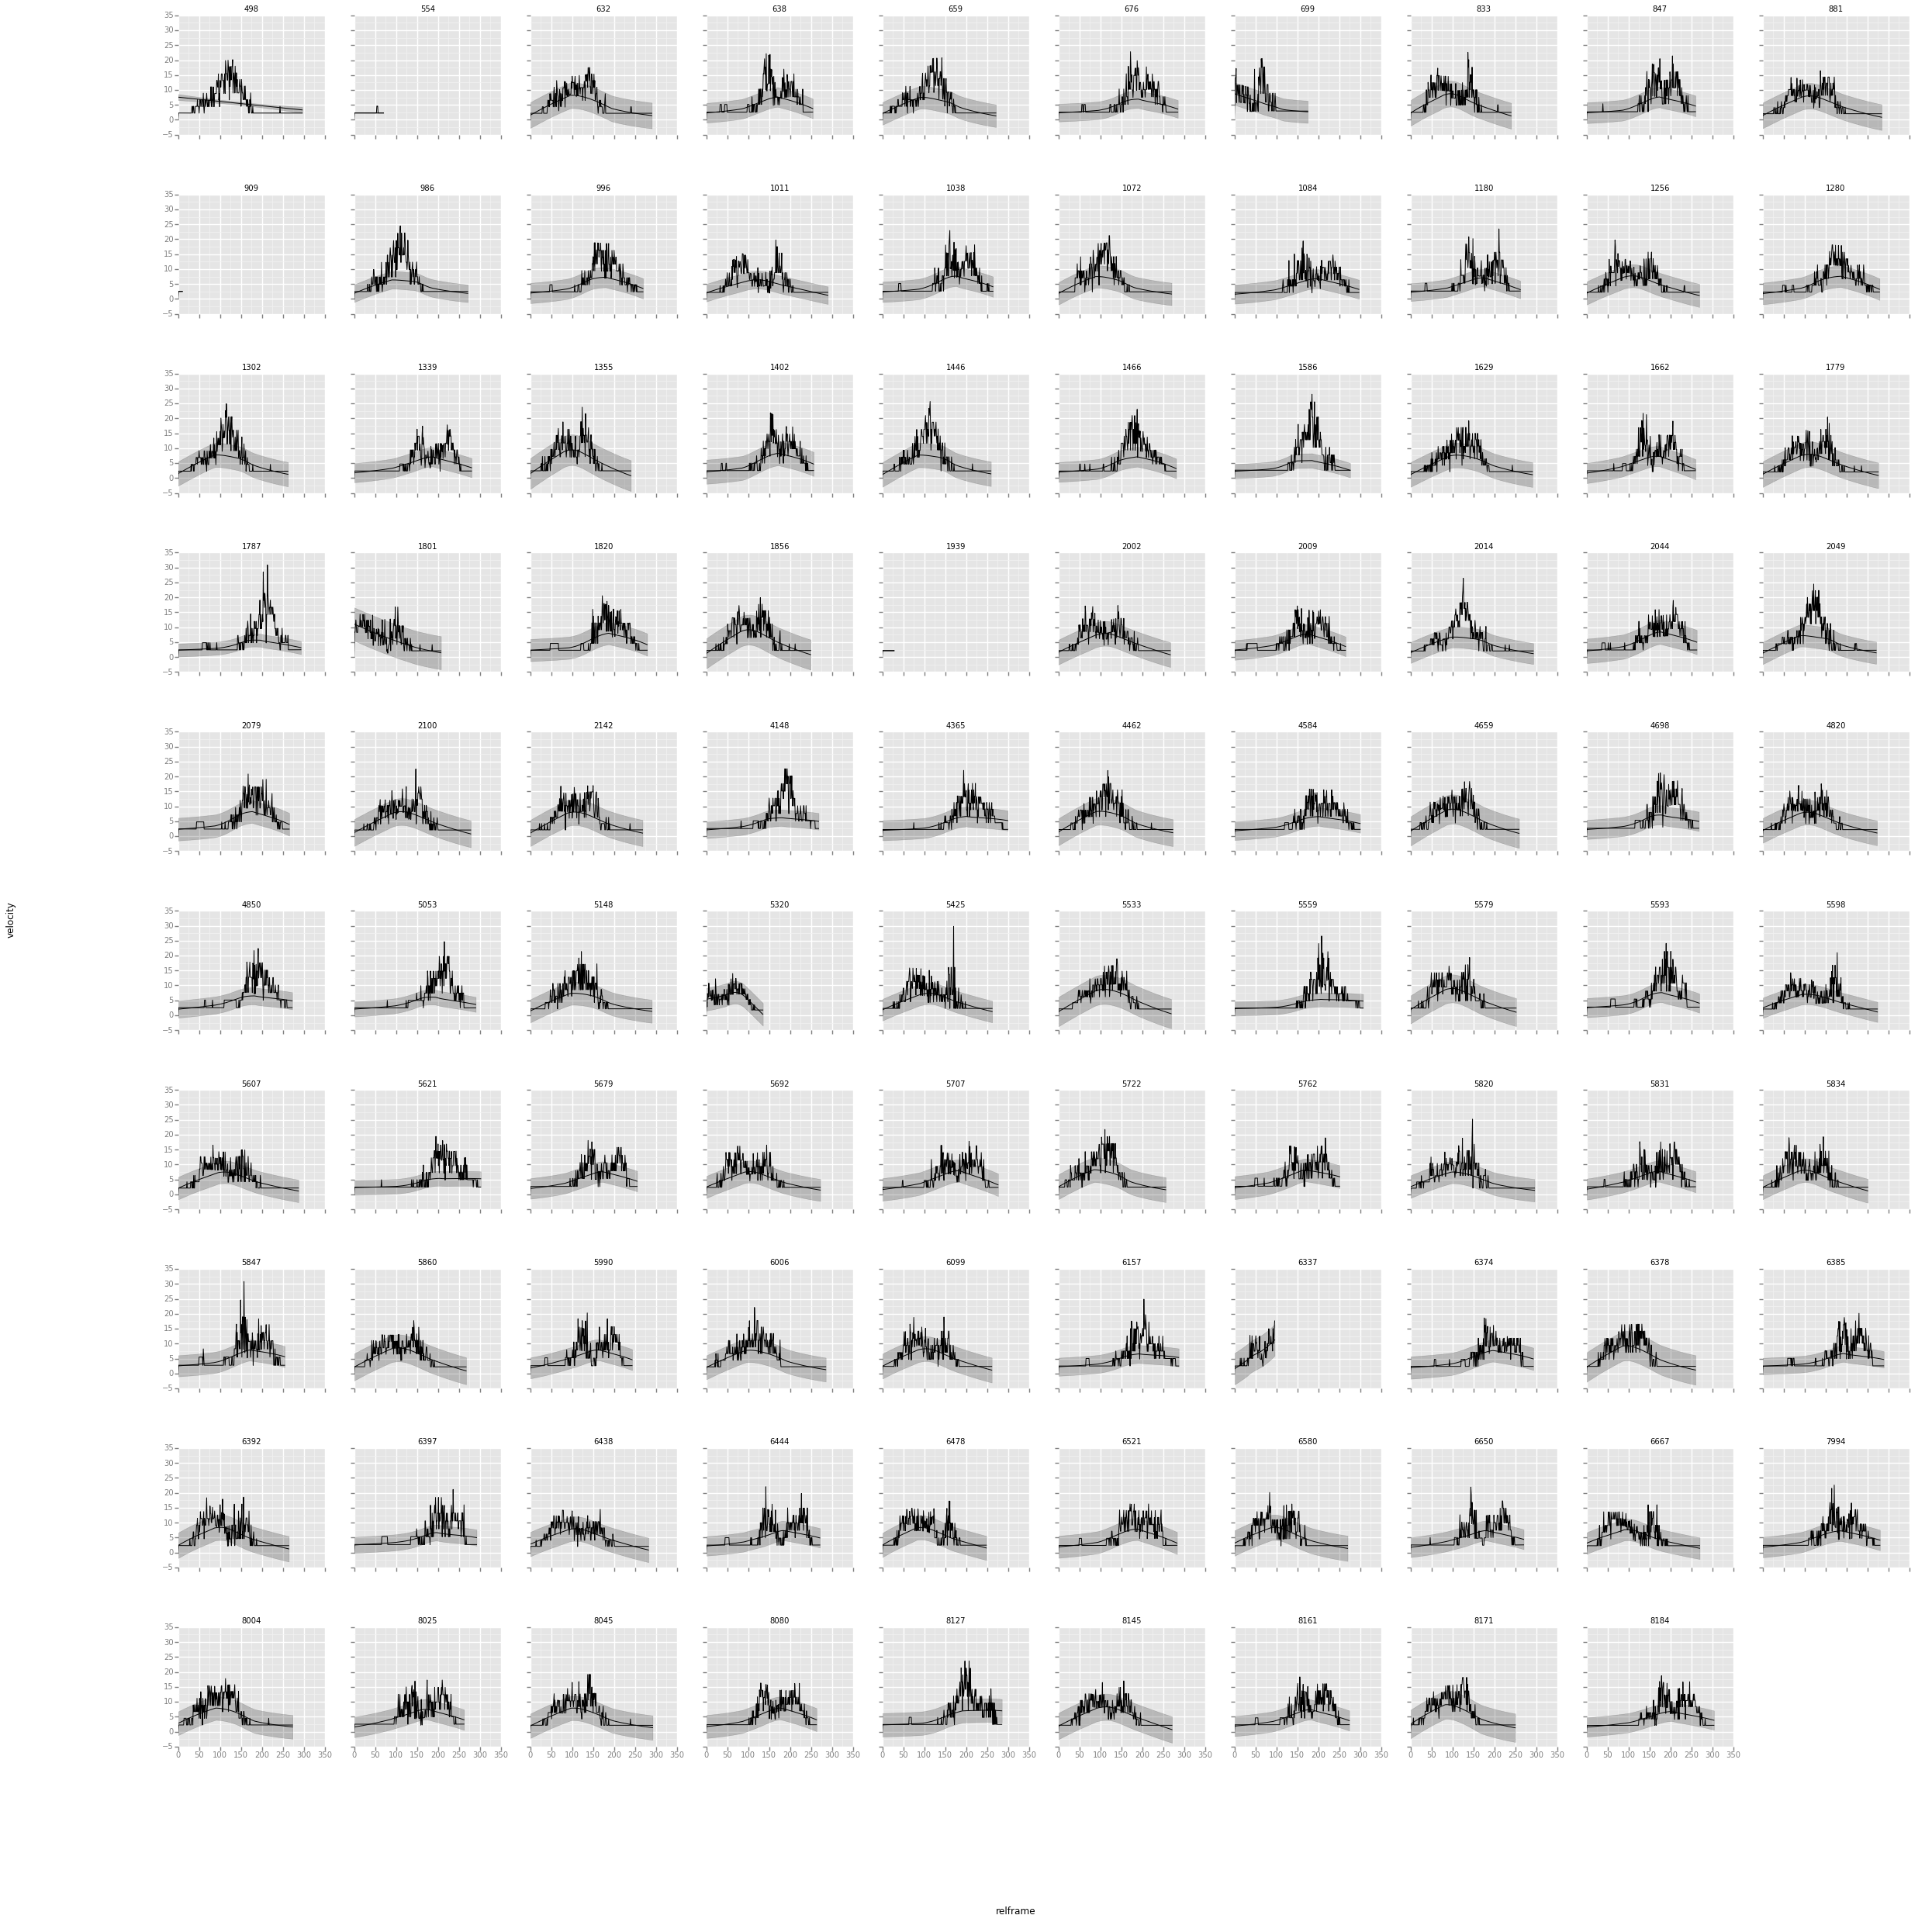

In [77]:
p = ggplot(d, aes(x='relframe', y='velocity')) + stat_smooth() + geom_line() + facet_wrap('trajectory')
p.save('C:/Users/corvera/Desktop/test.png',dpi=800,width=40,height=40)

In [33]:
 np.concatenate((np.zeros(1),np.linalg.norm(
    np.diff(d[d.trajectory==554].as_matrix(['flysim.x','flysim.y','flysim.z']),axis=0), axis=1)))

array([ 0.        ,  4.98625345,  5.07588172,  5.08862169,  4.94413363,
        4.83129743,  4.4517886 ,  4.18069454,  5.07883517,  4.79565985,
        4.69184105,  4.60387697,  4.4662806 ,  4.41817709,  4.86664212,
        5.23892814,  4.65096082,  5.03728535,  4.88680084,  4.56696874,
        4.13585633,  5.09040846,  4.7148824 ,  4.79302091,  5.09071641,
        5.13137709,  4.96085505,  4.75601908,  5.10734462,  4.76084576,
        4.92492765,  5.11418671,  5.2304319 ,  5.06299202,  5.0903835 ,
        4.87266724,  4.74913694,  4.70902407,  4.99550566,  4.80032469,
        4.99122926,  5.14574972,  4.64963457,  5.0963241 ,  4.74810909,
        4.73269518,  4.61948598,  4.70931068,  4.76354654,  4.66456237,
        4.92496747,  4.74961238,  5.08198356,  5.00575697,  4.72244081,
        4.77628594,  4.79215952,  4.94691916,  5.1207398 ,  5.15201847,
        5.06302529,  5.07869524,  4.94258331,  4.80894307,  5.20617476,
        4.8166614 ,  5.17026605,  5.10848779,  4.85405232,  5.00